# torch


### c'est quasi comme numpy

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [7]:
a = np.ones((5,10))
a

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [8]:
a = torch.ones((5,10))
a

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [9]:
b = torch.rand((10, 3))
b

tensor([[0.0093, 0.1704, 0.3717],
        [0.7991, 0.7141, 0.9096],
        [0.7468, 0.8883, 0.0655],
        [0.6105, 0.8276, 0.8073],
        [0.3106, 0.6937, 0.0513],
        [0.5487, 0.0555, 0.2679],
        [0.7802, 0.7504, 0.7682],
        [0.4174, 0.2969, 0.0651],
        [0.5664, 0.0793, 0.0943],
        [0.3124, 0.7471, 0.2580]])

In [10]:
a @ b

tensor([[5.1015, 5.2233, 3.6590],
        [5.1015, 5.2233, 3.6590],
        [5.1015, 5.2233, 3.6590],
        [5.1015, 5.2233, 3.6590],
        [5.1015, 5.2233, 3.6590]])

In [ ]:
a + 1

tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [12]:
a.shape

torch.Size([5, 10])

In [13]:
a.dtype

torch.float32

In [14]:
a.device

device(type='cpu')

In [15]:
a2 = a.to('cuda')


In [16]:
a2 + 2

tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]], device='cuda:0')

In [17]:
a = torch.rand((1_000, 1_000))
b = torch.rand((1_000, 1_000))
a2 = a.to('cuda')
b2 = b.to('cuda')


In [18]:
%timeit a @ b
%timeit a2 @ b2


3.55 ms ± 185 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
842 μs ± 5.99 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### torch dataset

In [19]:
from torchvision import datasets
from torchvision.transforms import ToTensor


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

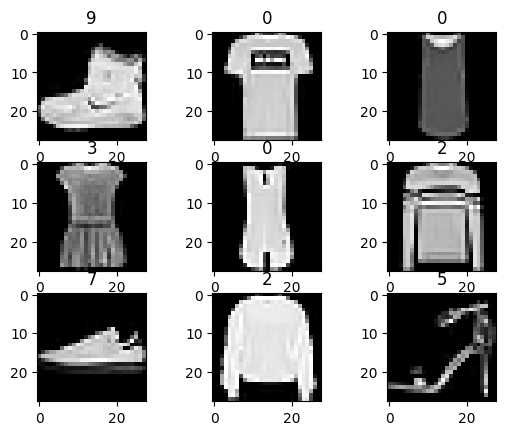

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=3)
for i in range(9):
    ax = axs.flatten()[i]
    img, label = training_data[i]
    img.shape
    
    ax.imshow(img[0, :, :], cmap="grey")
    ax.set_title(label)

    # figure.add_subplot(rows, cols, i)
    # plt.title(labels_map[label])
    # plt.axis("off")
    # plt.imshow(img.squeeze(), cmap="gray")

In [35]:
from torch import nn

In [36]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [37]:
model = NeuralNetwork().to("cuda")
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


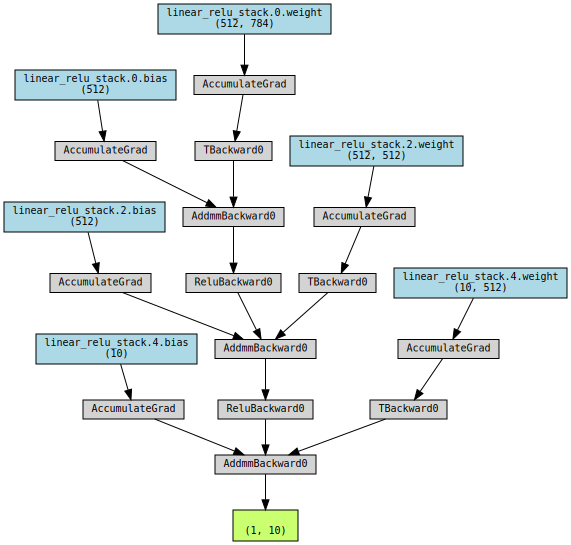

In [ ]:
from torchviz import make_dot

model = NeuralNetwork()
x = img
y = model(x)
make_dot(y, params=dict(model.named_parameters()))

In [48]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [49]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [51]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301806  [   64/60000]
loss: 2.297059  [ 6464/60000]
loss: 2.281256  [12864/60000]
loss: 2.283041  [19264/60000]
loss: 2.252992  [25664/60000]
loss: 2.230299  [32064/60000]
loss: 2.238394  [38464/60000]
loss: 2.206790  [44864/60000]
loss: 2.195976  [51264/60000]
loss: 2.177933  [57664/60000]
Test Error: 
 Accuracy: 35.3%, Avg loss: 2.170525 

Epoch 2
-------------------------------
loss: 2.175958  [   64/60000]
loss: 2.167090  [ 6464/60000]
loss: 2.120706  [12864/60000]
loss: 2.136989  [19264/60000]
loss: 2.080368  [25664/60000]
loss: 2.030649  [32064/60000]
loss: 2.048226  [38464/60000]
loss: 1.983670  [44864/60000]
loss: 1.975620  [51264/60000]
loss: 1.909873  [57664/60000]
Test Error: 
 Accuracy: 54.5%, Avg loss: 1.915960 

Epoch 3
-------------------------------
loss: 1.949544  [   64/60000]
loss: 1.914515  [ 6464/60000]
loss: 1.818140  [12864/60000]
loss: 1.845881  [19264/60000]
loss: 1.735612  [25664/60000]
loss: 1.697266  [32064/600